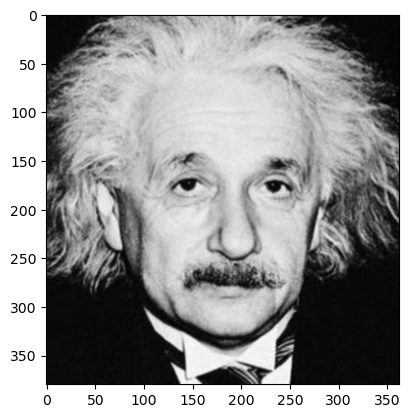

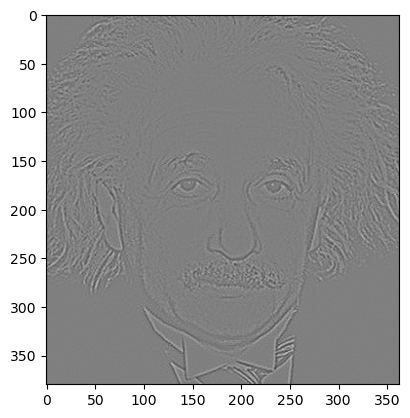

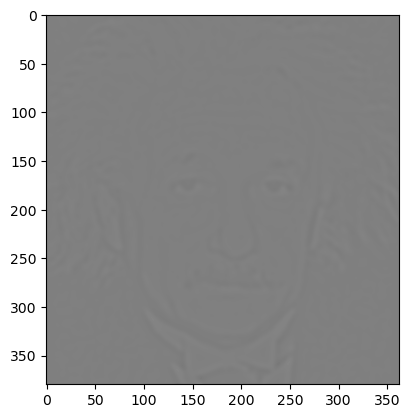

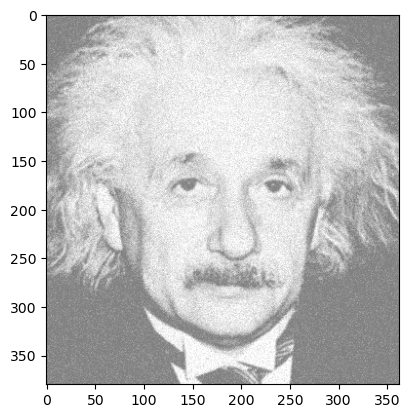

In [2]:
import numpy as np
import skimage.io
import skimage.filters
import skimage.color
import matplotlib.pyplot as plt


img = skimage.io.imread("einstein.png")

img = img /255

img_g = skimage.filters.gaussian(img, sigma=3)
img_n = skimage.util.random_noise(img, var=0.01) 

img_l = skimage.filters.laplace(img)
img_l_g = skimage.filters.laplace(img_g)
img_l_n = skimage.filters.laplace(img_n)

plt.imshow(img, cmap='gray', vmin=0, vmax=1)
plt.show()

plt.imshow(img_l, cmap='gray', vmin=-1, vmax=1)
plt.show()

plt.imshow(img_l_g, cmap='gray', vmin=-1, vmax=1)
plt.show()

plt.imshow(img_n, cmap='gray', vmin=-1, vmax=1)
plt.show()

Der Laplace Filter macht die Kanten sichtbarerer. Wendet man und den Laplacefilter auf das Gauß Bild an, so sind die Kanten hier nicht so stark ausgeprägt, da das Bild zuerst weichgezeichnet wurde. Auf dem verrauschten Bild sind zusätzlich zum Rauschen auch die Kanten und feinen Details hervorgehoben.

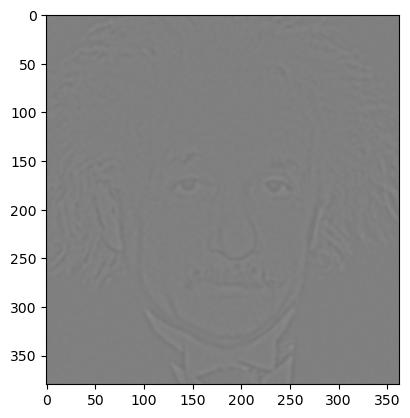

In [3]:
img_n_s = skimage.filters.gaussian(img_n, sigma=2)


img_n_s_l = skimage.filters.laplace(img_n_s)
plt.imshow(img_n_s_l, cmap='gray', vmin=-1, vmax=1)
plt.show()

Wenn wir das verrrauschte Bild erst mit dem Gauss Filter glätten, kann das das Ergebnis verbessern
So werden die Kanten wieder besser sichtbar, wie in dem Original bild mit dem Laplace Filter.

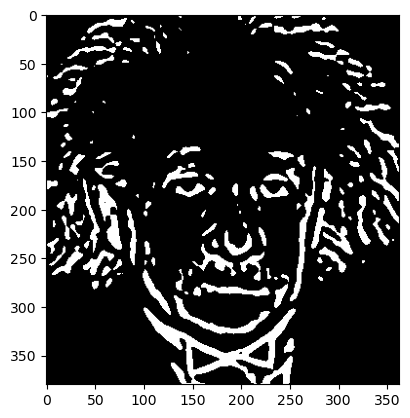

In [25]:
threshold = 0.005


edges = img_l_g > threshold

# Visualisieren der Ergebnisse
plt.imshow(edges, cmap='gray')
plt.show()

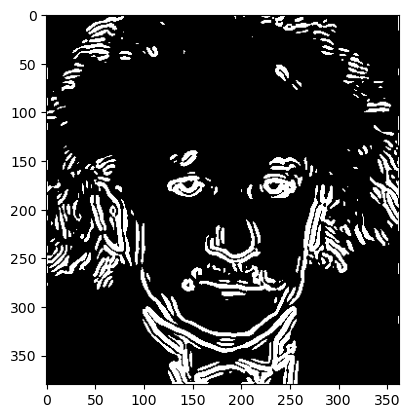

array([[0.00412448, 0.00448048, 0.00054335, ..., 0.00064242, 0.00507072,
        0.00467816],
       [0.00411642, 0.0044648 , 0.00052664, ..., 0.00072359, 0.00520111,
        0.00476936],
       [0.0041152 , 0.00445912, 0.00051509, ..., 0.00079414, 0.00534435,
        0.00487407],
       ...,
       [0.00427675, 0.00464137, 0.00056389, ..., 0.00051604, 0.00433437,
        0.00400285],
       [0.00428548, 0.00465004, 0.00073745, ..., 0.0004934 , 0.00418761,
        0.00392437],
       [0.00426455, 0.00462969, 0.00070436, ..., 0.00035833, 0.003997  ,
        0.0037884 ]])

In [26]:
sobel = skimage.filters.sobel(img_l_g)
threshold = 0.005
edges_s = sobel > threshold
plt.imshow(edges_s, cmap='gray')
plt.show()
sobel